Species: DDS; Prevalence: 42.035%.
Species: DM; Prevalence: 24.336%.
Species: DCEeC; Prevalence: 33.628%.


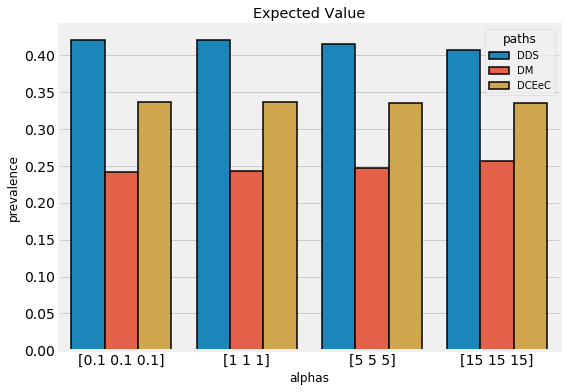

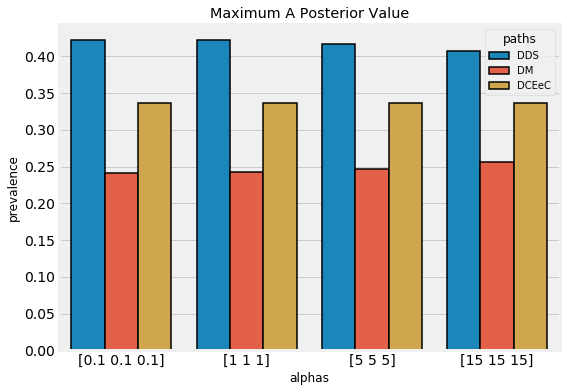

In [25]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 22
%matplotlib inline

import pymc3 as pm

from pymc_utils import *



# number of prior students per specialisation
paths = ['DDS', 'DM', 'DCEeC']
c = np.array([94, 54, 75])
#c = np.array([51, 41, 35])


# hyperparameters (initially all equal 1)
alphas = np.array([1, 1, 1])

# alternative values for alpha
alpha_list = [np.array([0.1, 0.1, 0.1]), np.array([1, 1, 1]),
					np.array([5, 5, 5]), np.array([15, 15, 15])]


####################################################################################
#######                                                                      #######
#######   Build Model                                                        #######
#######                                                                      #######
####################################################################################


# calculate expected value (EV) based on alphas = 1
display_probs(dict(zip(paths, (alphas + c) / (c.sum() + alphas.sum()))))

# expand to all alphas in the alpha_list and calculate expected value (EV)
values = []
for alpha_new in alpha_list:
	values.append((alpha_new + c) / (c.sum() + alpha_new.sum()))

# create a data frame of results
value_df = pd.DataFrame(values, columns = paths)
value_df['alphas'] = [str(x) for x in alpha_list]
value_df

# 'Melt' the data into a categorical data frame
melted = pd.melt(value_df, id_vars = 'alphas', value_name='prevalence',
		var_name = 'paths')

# plot the results
plt.figure(figsize = (8, 6))
sns.barplot(x = 'alphas', y = 'prevalence', hue = 'paths', data = melted,
			edgecolor = 'k', linewidth = 1.5);
plt.xticks(size = 14); plt.yticks(size = 14)
plt.title('Expected Value');

# calculate MAP for a posterior distribution
values = []
for alpha_new in alpha_list:
	values.append((alpha_new + c - 1) / sum(alpha_new + c - 1))

# create a data frame of results
value_df = pd.DataFrame(values, columns = paths)
value_df['alphas'] = [str(x) for x in alpha_list]
value_df

# 'Melt' the data into a categorical data frame
melted = pd.melt(value_df, id_vars = 'alphas', value_name='prevalence',
		var_name = 'paths')

# plot the results
plt.figure(figsize = (8, 6))
sns.barplot(x = 'alphas', y = 'prevalence', hue = 'paths', data = melted,
			edgecolor = 'k', linewidth = 1.5);
plt.xticks(size = 14); plt.yticks(size = 14)
plt.title('Maximum A Posterior Value');
# end

mean1_dds = np.mean(value_df['DDS'])
mean1_dm = np.mean(value_df['DM'])
mean1_dceec = np.mean(value_df['DCEeC'])

Species: DDS; Prevalence: 40.0%.
Species: DM; Prevalence: 32.308%.
Species: DCEeC; Prevalence: 27.692%.

Preferences: 

0.4067036761075919
0.2851532174646628
0.30814310642774523


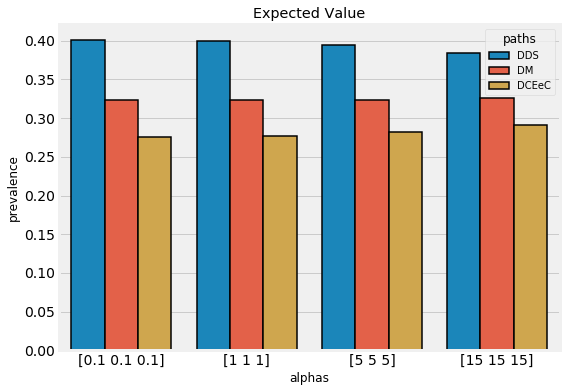

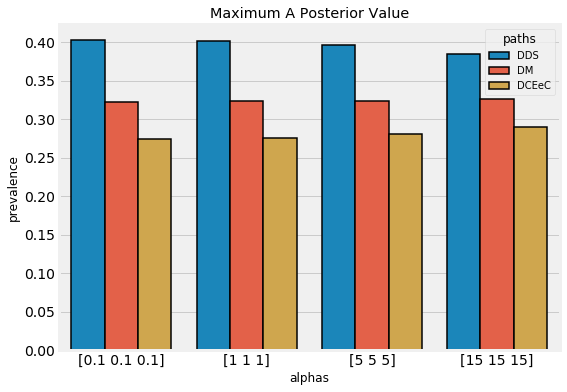

In [33]:

# number of prior students per specialisation
paths = ['DDS', 'DM', 'DCEeC']
#c = np.array([94, 54, 75])
c = np.array([51, 41, 35])

# hyperparameters (initially all equal 1)
alphas = np.array([1, 1, 1])

# alternative values for alpha
alpha_list = [np.array([0.1, 0.1, 0.1]), np.array([1, 1, 1]),
					np.array([5, 5, 5]), np.array([15, 15, 15])]


# calculate expected value (EV) based on alphas = 1
display_probs(dict(zip(paths, (alphas + c) / (c.sum() + alphas.sum()))))

# expand to all alphas in the alpha_list and calculate expected value (EV)
values = []
for alpha_new in alpha_list:
	values.append((alpha_new + c) / (c.sum() + alpha_new.sum()))

# create a data frame of results
value_df = pd.DataFrame(values, columns = paths)
value_df['alphas'] = [str(x) for x in alpha_list]
value_df

# 'Melt' the data into a categorical data frame
melted = pd.melt(value_df, id_vars = 'alphas', value_name='prevalence',
		var_name = 'paths')

# plot the results
plt.figure(figsize = (8, 6))
sns.barplot(x = 'alphas', y = 'prevalence', hue = 'paths', data = melted,
			edgecolor = 'k', linewidth = 1.5);
plt.xticks(size = 14); plt.yticks(size = 14)
plt.title('Expected Value');

# calculate MAP for a posterior distribution
values = []
for alpha_new in alpha_list:
	values.append((alpha_new + c - 1) / sum(alpha_new + c - 1))

# create a data frame of results
value_df = pd.DataFrame(values, columns = paths)
value_df['alphas'] = [str(x) for x in alpha_list]
value_df

# 'Melt' the data into a categorical data frame
melted = pd.melt(value_df, id_vars = 'alphas', value_name='prevalence',
		var_name = 'paths')

# plot the results
plt.figure(figsize = (8, 6))
sns.barplot(x = 'alphas', y = 'prevalence', hue = 'paths', data = melted,
			edgecolor = 'k', linewidth = 1.5);
plt.xticks(size = 14); plt.yticks(size = 14)
plt.title('Maximum A Posterior Value');
# end


mean2_dds = np.mean(value_df['DDS'])
mean2_dm = np.mean(value_df['DM'])
mean2_dceec = np.mean(value_df['DCEeC'])

meanfinal_dds = (mean1_dds + mean2_dds) / 2
meanfinal_dm = (mean1_dm + mean2_dm) / 2
meanfinal_dceec = (mean1_dceec + mean2_dceec) / 2

print('\nPreferences: \n')
print(meanfinal_dds)
print(meanfinal_dm)
print(meanfinal_dceec)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [parameters]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 3000/3000 [00:23<00:00, 125.86it/s]
C:\Users\Thomas\AppData\Roaming\Python\Python37\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


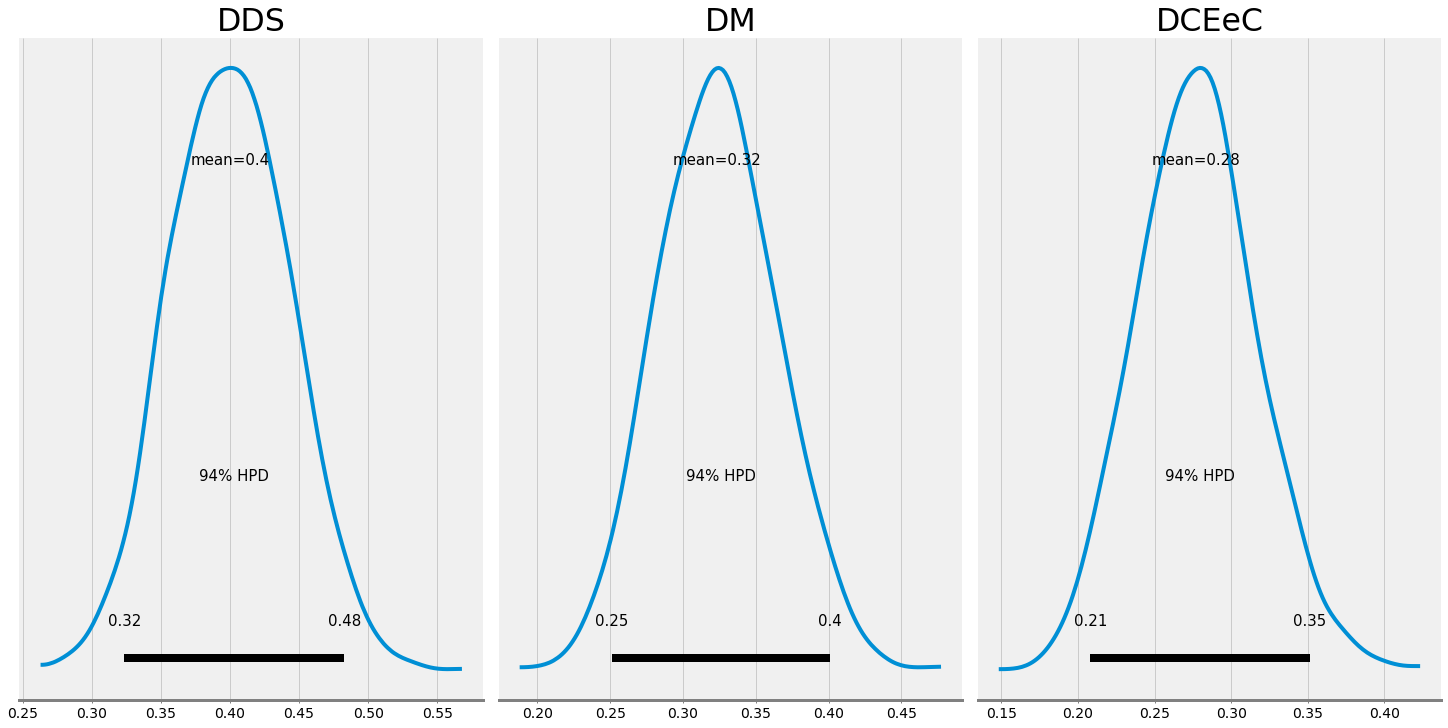

In [34]:
# YOU MAY NEED TO INSTALL THE FOLLOWING
#!pip install pymc3
#!pip install seaborn
#!pip install matplotlib
#!pip install enum34


import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 22
%matplotlib inline

import pymc3 as pm

from pymc_utils import *


# observations
paths = ['DDS', 'DM', 'DCEeC']
c = np.array([51, 41, 35])

# hyperparameters (initially all equal 1)
alphas = np.array([1, 1, 1])

# alternative values for alpha
alpha_list = [np.array([0.1, 0.1, 0.1]), np.array([1, 1, 1]),
					np.array([5, 5, 5]), np.array([15, 15, 15])]


with pm.Model() as model:
	# Parameters of the Multinomial are from a Dirichlet
	parameters = pm.Dirichlet('parameters', a=alphas, shape=3)
	# Observed data is from a Multinomial distribution
	observed_data = pm.Multinomial('observed_data', n=127, p=parameters, shape=3, observed=c)

model

with model:
	# Sample from the posterior
	trace = pm.sample(draws=2000, cores=1, chains=2, tune=1000, discard_tuned_samples=True)

# compile summary statistics of the simulation
summary = pm.summary(trace)
summary.index = paths
summary

# build a data frame of the results
trace_df = pd.DataFrame(trace['parameters'], columns = paths)
trace_df.head()

# plot the posterior distribution
ax = pm.plot_posterior(trace, varnames = ['parameters'], figsize = (20, 10));
plt.rcParams['font.size'] = 22
for i, a in enumerate(paths):
	ax[i].set_title(a);


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [parameters]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [00:12<00:00, 117.52it/s]
C:\Users\Thomas\AppData\Roaming\Python\Python37\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


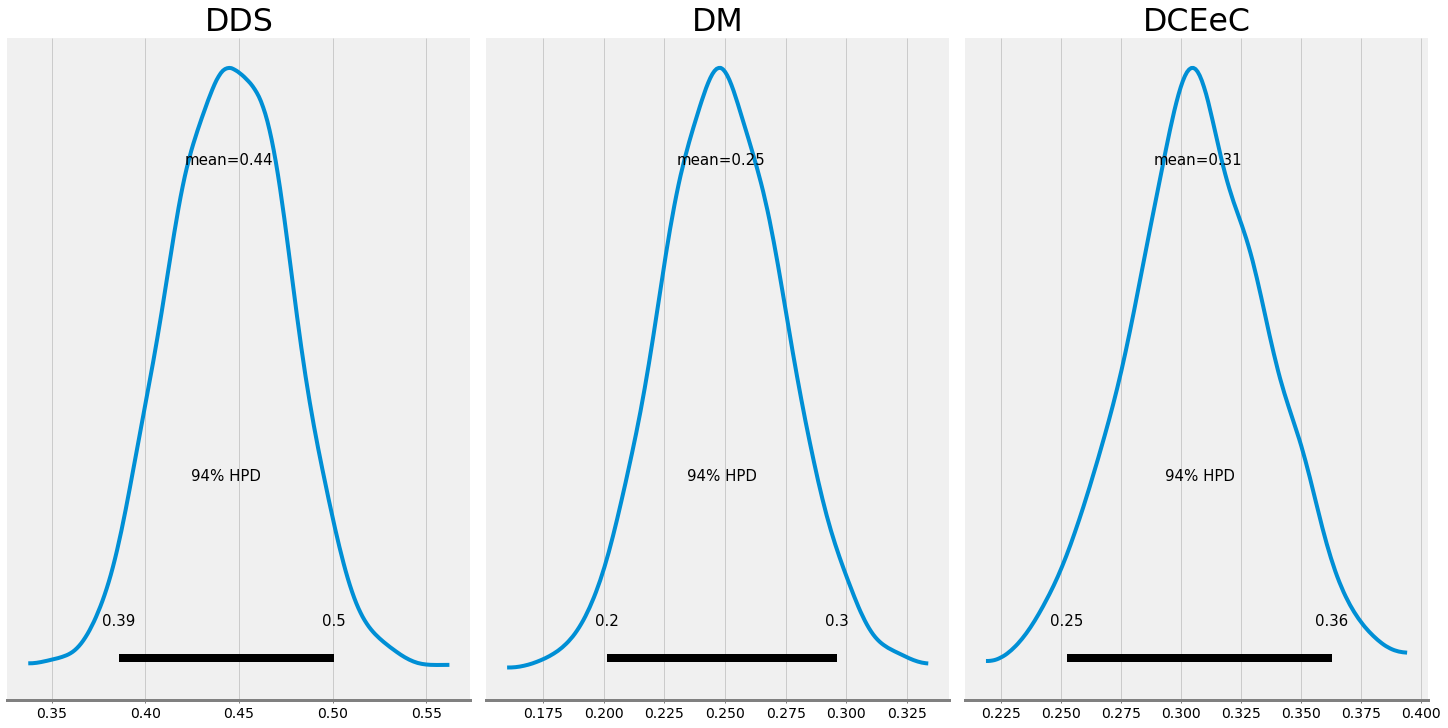

In [35]:

# create some more observaions
c = np.array([[62, 22, 43],
             [51, 41, 35]
#              [45, 29, 53],
#			  [67, 18, 42]
             ])

# rerun the sampling
with pm.Model() as model:
	# Parameters are a dirichlet distribution
	parameters = pm.Dirichlet('parameters', a=alphas, shape=3)
	# Observed data is a multinomial distribution
	observed_data = pm.Multinomial(
		'observed_data', n=127, p=parameters, shape=3, observed=c)    
	
	trace = pm.sample(draws=1000, cores=1, chains=2, tune=500, discard_tuned_samples=True)

# build a data frame of the results
trace_df = pd.DataFrame(trace['parameters'], columns = paths)
trace_df.head()

# plot the posterior distribution
ax = pm.plot_posterior(trace, varnames = ['parameters'], figsize = (20, 10));
plt.rcParams['font.size'] = 22
for i, a in enumerate(paths):
	ax[i].set_title(a);
